In [1]:
# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries for train-test split and cross-validation
from sklearn.model_selection import (
    train_test_split, 
    KFold, 
    cross_validate,
    cross_val_score
)

# Import pipeline and column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import encoding techniques
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder

# Import regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import (
    RandomForestRegressor, 
    AdaBoostRegressor, 
    GradientBoostingRegressor
)
from xgboost import XGBRegressor

# Import metrics for model evaluation
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

# Import Optuna for hyperparameter optimization
import optuna
from optuna import Trial, create_study

/opt/homebrew/anaconda3/envs/datascience-purwadhika/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **1. Load Dataset**

In [2]:
# Load the DataFrame from a CSV file
df = pd.read_csv('./data_saudi_used_cars_processed.csv')

# Display the contents of the DataFrame
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
1,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
2,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
3,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
4,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
3649,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
3650,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
3651,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
3652,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


In [3]:
# Display a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3654 non-null   object 
 1   Region       3654 non-null   object 
 2   Make         3654 non-null   object 
 3   Gear_Type    3654 non-null   object 
 4   Origin       3654 non-null   object 
 5   Options      3654 non-null   object 
 6   Year         3654 non-null   int64  
 7   Engine_Size  3654 non-null   float64
 8   Mileage      3654 non-null   int64  
 9   Price        3654 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 285.6+ KB


## **2. Define X and y**

In [4]:
# Separate features (X) and target variable (y) from the DataFrame
X = df.drop(columns='Price')
y = df['Price']

## **3. Data Splitting**

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,                  # Features for training and testing
    y,                  # Target variable for training and testing
    test_size=0.2,      # Proportion of the data to include in the test set (20%)
    random_state=42,    # Seed for the random number generator to ensure reproducibility
)

## **4. Preprocessing**

- onehot: gender, ever_married, work_type, Residence_type, smoking_status
- imputer: bmi
- robust scaler: age, avg_glucose_level, bmi

In [6]:
# Define a ColumnTransformer for different preprocessing tasks
transformer = ColumnTransformer([
    ('binary', BinaryEncoder(), ['Type', 'Region', 'Make']),            # Apply BinaryEncoder to 'Type', 'Region', and 'Make'
    ('onehot', OneHotEncoder(), ['Gear_Type', 'Origin', 'Options']),    # Apply OneHotEncoder to 'Gear_Type', 'Origin', and 'Options'
    ('robust', RobustScaler(), ['Year', 'Engine_Size', 'Mileage']),     # Apply RobustScaler to 'Year', 'Engine_Size', and 'Mileage'
], remainder='passthrough')                                             # Pass through other columns without transformation

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make']),
                                ('onehot', OneHotEncoder(),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('robust', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

## **5. Modeling**

In [7]:
# Define different regression algorithms

# Basic Model
# Linear Regression
lr = LinearRegression()

# Ridge Regression with regularization
ridge = Ridge(random_state=42)

# Lasso Regression with regularization
lasso = Lasso(random_state=42)

# ElasticNet Regression, combining L1 and L2 regularization
en = ElasticNet(random_state=42)

# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=3)

# Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Ensemble Model
# Random Forest Regressor, an ensemble method using multiple decision trees
rf = RandomForestRegressor(random_state=42)

# AdaBoost Regressor, an ensemble method that combines weak learners to improve performance
adaboost = AdaBoostRegressor(random_state=42)

# Gradient Boosting Regressor, an ensemble method that builds models sequentially
gradboost = GradientBoostingRegressor(random_state=42)

# XGBoost Regressor, an optimized gradient boosting library
xgboost = XGBRegressor()


### **1. Cross Validation**

In [8]:
# List of scoring metrics for evaluating regression models
scorer = [
    'neg_root_mean_squared_error',          # Negative root mean squared error
    'neg_mean_absolute_error',              # Negative mean absolute error
    'neg_mean_absolute_percentage_error'    # Negative mean absolute percentage error
]

In [9]:
# List of regression algorithms to evaluate
list_algo = [lr, ridge, lasso, en, knn, tree, rf, adaboost, gradboost, xgboost]

# Lists to store evaluation metrics and their standard deviations
list_rmse = []
list_std_rmse = []

list_mae = []
list_std_mae = []

list_mape = []
list_std_mape = []

# Loop through each algorithm in the list
for algo in list_algo:

    # Define a pipeline that includes preprocessing and model training
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),  # Apply preprocessing steps defined earlier
        ('model', algo)                  # Apply the current model
    ])

    # Define a K-Fold cross-validation strategy
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation and compute metrics
    cv_score = cross_validate(
        estimator=pipe_prep_model,       # The pipeline to evaluate
        X=X_train,                       # Training features
        y=y_train,                       # Training target
        cv=crossval,                     # Number of cross-validation folds
        scoring=scorer,                  # List of scoring metrics
    )

    # Append the mean and standard deviation of each metric to the respective lists
    list_rmse.append(cv_score['test_neg_root_mean_squared_error'].mean())
    list_std_rmse.append(cv_score['test_neg_root_mean_squared_error'].std())
    
    list_mae.append(cv_score['test_neg_mean_absolute_error'].mean())
    list_std_mae.append(cv_score['test_neg_mean_absolute_error'].std())
    
    list_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].mean())
    list_std_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].std())

In [10]:
# Create a DataFrame to store the results of model evaluations
score_cv = pd.DataFrame({
    'model': [str(x).split('(')[0] for x in list_algo],
    'rmse_mean': list_rmse,
    'rmse_std': list_std_rmse,
    'mae_mean': list_mae,
    'mae_std': list_std_mae,
    'mape_mean': list_mape,
    'mape_std': list_std_mape,
})

In [11]:
# Sorting the DataFrame 'score_cv' based on the 'rmse_mean' column
# in descending order (from highest to lowest).
score_cv.sort_values(by='rmse_mean', ascending=False)

,model,rmse_mean,rmse_std,mae_mean,mae_std,mape_mean,mape_std
9,XGBRegressor,-31864.470225,2690.264581,-18006.181752,1362.874180,-0.272911,0.008889
6,RandomForestRegressor,-33817.631651,1897.008529,-18568.641221,860.998229,-0.286076,0.006685
8,GradientBoostingRegressor,-36020.252964,3086.721826,-21211.772684,1628.314482,-0.318852,0.015454
4,KNeighborsRegressor,-36363.117108,3745.678586,-20522.138012,1261.921637,-0.328637,0.012755
5,DecisionTreeRegressor,-47725.029183,4191.574970,-24938.090515,1463.332397,-0.365888,0.035627
1,Ridge,-50668.668937,5335.875510,-32885.142223,1982.073907,-0.606862,0.035691
2,Lasso,-50674.673208,5339.428043,-32895.645758,1987.466337,-0.607237,0.035782
0,LinearRegression,-50676.541540,5338.652439,-32897.895901,1989.842864,-0.607308,0.035806
3,ElasticNet,-55011.751870,5453.820927,-34685.782714,2040.419197,-0.605482,0.021134
7,AdaBoostRegressor,-57770.315175,2013.670622,-49762.541720,1987.321092,-1.082164,0.064093


In [12]:
# Sorting the DataFrame 'score_cv' based on the 'rmse_mean' column
# in descending order (from highest to lowest).
score_cv.sort_values(by='mae_mean', ascending=False)

,model,rmse_mean,rmse_std,mae_mean,mae_std,mape_mean,mape_std
9,XGBRegressor,-31864.470225,2690.264581,-18006.181752,1362.874180,-0.272911,0.008889
6,RandomForestRegressor,-33817.631651,1897.008529,-18568.641221,860.998229,-0.286076,0.006685
4,KNeighborsRegressor,-36363.117108,3745.678586,-20522.138012,1261.921637,-0.328637,0.012755
8,GradientBoostingRegressor,-36020.252964,3086.721826,-21211.772684,1628.314482,-0.318852,0.015454
5,DecisionTreeRegressor,-47725.029183,4191.574970,-24938.090515,1463.332397,-0.365888,0.035627
1,Ridge,-50668.668937,5335.875510,-32885.142223,1982.073907,-0.606862,0.035691
2,Lasso,-50674.673208,5339.428043,-32895.645758,1987.466337,-0.607237,0.035782
0,LinearRegression,-50676.541540,5338.652439,-32897.895901,1989.842864,-0.607308,0.035806
3,ElasticNet,-55011.751870,5453.820927,-34685.782714,2040.419197,-0.605482,0.021134
7,AdaBoostRegressor,-57770.315175,2013.670622,-49762.541720,1987.321092,-1.082164,0.064093


In [13]:
# Sorting the DataFrame 'score_cv' based on the 'rmse_mean' column
# in descending order (from highest to lowest).
score_cv.sort_values(by='mape_mean', ascending=False)

,model,rmse_mean,rmse_std,mae_mean,mae_std,mape_mean,mape_std
9,XGBRegressor,-31864.470225,2690.264581,-18006.181752,1362.874180,-0.272911,0.008889
6,RandomForestRegressor,-33817.631651,1897.008529,-18568.641221,860.998229,-0.286076,0.006685
8,GradientBoostingRegressor,-36020.252964,3086.721826,-21211.772684,1628.314482,-0.318852,0.015454
4,KNeighborsRegressor,-36363.117108,3745.678586,-20522.138012,1261.921637,-0.328637,0.012755
5,DecisionTreeRegressor,-47725.029183,4191.574970,-24938.090515,1463.332397,-0.365888,0.035627
3,ElasticNet,-55011.751870,5453.820927,-34685.782714,2040.419197,-0.605482,0.021134
1,Ridge,-50668.668937,5335.875510,-32885.142223,1982.073907,-0.606862,0.035691
2,Lasso,-50674.673208,5339.428043,-32895.645758,1987.466337,-0.607237,0.035782
0,LinearRegression,-50676.541540,5338.652439,-32897.895901,1989.842864,-0.607308,0.035806
7,AdaBoostRegressor,-57770.315175,2013.670622,-49762.541720,1987.321092,-1.082164,0.064093


In [14]:
# Define the list of models to evaluate
list_algo = [xgboost]

# Initialize lists to store the performance scores
score_rmse = []
score_mae = []
score_mape = []

# Predict on the test set
for algo in list_algo:
    # Create a pipeline with preprocessing and model
    model = Pipeline([
        ('preprocessing', transformer),
        ('model', algo)
    ])

    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate and store performance metrics
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

# Create a DataFrame to store the results of model evaluations
score_before_tuning = pd.DataFrame({
    'model': [str(x).split('(')[0] for x in list_algo],  # Extract model names from the list
    'score_rmse': score_rmse,                            # Store RMSE scores
    'score_mae': score_mae,                              # Store MAE scores
    'score_mape': score_mape                             # Store MAPE scores
})

# Display the DataFrame
score_before_tuning

,model,score_rmse,score_mae,score_mape
0,XGBRegressor,27085.84955,14884.088661,0.232421


In [15]:
# Selecting the 10th row from the score_cv DataFrame to view the benchmark model performance metrics
score_cv.iloc[[9]]

,model,rmse_mean,rmse_std,mae_mean,mae_std,mape_mean,mape_std
9,XGBRegressor,-31864.470225,2690.264581,-18006.181752,1362.87418,-0.272911,0.008889


### **2. Hyperparameter Tuning**

In [16]:
def instantiate_model(trial: Trial) -> Pipeline:
    params = {
        'xgb': {
            'max_depth': trial.suggest_int('max_depth', 1, 10), 
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
            'n_estimators': trial.suggest_int('n_estimators', 100, 200),
            'subsample': trial.suggest_float('subsample', 0.2, 1),
            'gamma': trial.suggest_int('gamma', 1, 10),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 1e-1, log=True),
            'random_state': trial.suggest_int('random_state', 0, 42)
        },
        'onehot': {
            'drop': trial.suggest_categorical('drop', [None, 'first'])
        },
    }

    transformer = ColumnTransformer([
        ('binary', BinaryEncoder(), ['Type', 'Region', 'Make']),                                # Apply BinaryEncoder to 'Type', 'Region', and 'Make'
        ('onehot', OneHotEncoder(**params['onehot']), ['Gear_Type', 'Origin', 'Options']),      # Apply OneHotEncoder to 'Gear_Type', 'Origin', and 'Options'
        ('robust', RobustScaler(), ['Year', 'Engine_Size', 'Mileage']),                         # Apply RobustScaler to 'Year', 'Engine_Size', and 'Mileage'
    ], remainder='passthrough')                                                                 # Pass through other columns without transformation

    model = Pipeline([
        ('preprocess', transformer),
        ('model', XGBRegressor(**params['xgb']))
    ])

    return model

In [17]:
def objective(trial):
    estimator = instantiate_model(trial)
    skfold = KFold(n_splits=5, shuffle=True, random_state=0)
    scores = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='neg_root_mean_squared_error')
    
    return np.mean(scores)

In [18]:
study = create_study(study_name='optimization', direction='maximize', pruner=optuna.pruners.MedianPruner())

[I 2024-10-07 19:12:50,214] A new study created in memory with name: optimization


In [19]:
study.optimize(lambda trial: objective(trial), n_trials=75)

[I 2024-10-07 19:12:51,716] Trial 0 finished with value: -35107.04967695009 and parameters: {'max_depth': 4, 'learning_rate': 0.37682639636416987, 'n_estimators': 129, 'subsample': 0.39919144328142064, 'gamma': 9, 'colsample_bytree': 0.8075497483822798, 'reg_alpha': 0.000282770992823989, 'random_state': 39, 'drop': None}. Best is trial 0 with value: -35107.04967695009.
[I 2024-10-07 19:12:53,566] Trial 1 finished with value: -36344.49976774887 and parameters: {'max_depth': 9, 'learning_rate': 0.31208576055155435, 'n_estimators': 178, 'subsample': 0.9483000430717408, 'gamma': 2, 'colsample_bytree': 0.1357595213515504, 'reg_alpha': 4.601959161673967e-05, 'random_state': 27, 'drop': None}. Best is trial 0 with value: -35107.04967695009.
[I 2024-10-07 19:12:54,777] Trial 2 finished with value: -39374.81294517411 and parameters: {'max_depth': 4, 'learning_rate': 0.5335489608284258, 'n_estimators': 160, 'subsample': 0.4070303631197362, 'gamma': 5, 'colsample_bytree': 0.543048171619433, 'reg_

In [20]:
study.optimize(lambda trial: objective(trial), n_trials=25)

[I 2024-10-07 19:14:56,688] Trial 75 finished with value: -29454.633699982904 and parameters: {'max_depth': 6, 'learning_rate': 0.056450130857786086, 'n_estimators': 195, 'subsample': 0.670566671260697, 'gamma': 4, 'colsample_bytree': 0.8346887330854736, 'reg_alpha': 0.07066571296134068, 'random_state': 28, 'drop': 'first'}. Best is trial 75 with value: -29454.633699982904.
[I 2024-10-07 19:14:58,850] Trial 76 finished with value: -32772.18491785646 and parameters: {'max_depth': 6, 'learning_rate': 0.015116294063842062, 'n_estimators': 195, 'subsample': 0.6576522829317769, 'gamma': 4, 'colsample_bytree': 0.8371564465992453, 'reg_alpha': 0.03649537592756697, 'random_state': 32, 'drop': 'first'}. Best is trial 75 with value: -29454.633699982904.
[I 2024-10-07 19:15:00,743] Trial 77 finished with value: -29747.534783720475 and parameters: {'max_depth': 6, 'learning_rate': 0.06897374746227666, 'n_estimators': 172, 'subsample': 0.7143027396786291, 'gamma': 4, 'colsample_bytree': 0.891124010

In [21]:
study.best_value

-29167.98177621385

In [22]:
study.best_params

{'max_depth': 7,
 'learning_rate': 0.07530917098377808,
 'n_estimators': 173,
 'subsample': 0.6662398957831182,
 'gamma': 4,
 'colsample_bytree': 0.8913844246487428,
 'reg_alpha': 0.07289549690168273,
 'random_state': 37,
 'drop': 'first'}

### **3. Evaluation Model**

In [23]:
study.best_value

-29167.98177621385

In [24]:
best_trial = study.best_trial
best_trial

FrozenTrial(number=81, state=1, values=[-29167.98177621385], datetime_start=datetime.datetime(2024, 10, 7, 19, 15, 7, 245043), datetime_complete=datetime.datetime(2024, 10, 7, 19, 15, 9, 509574), params={'max_depth': 7, 'learning_rate': 0.07530917098377808, 'n_estimators': 173, 'subsample': 0.6662398957831182, 'gamma': 4, 'colsample_bytree': 0.8913844246487428, 'reg_alpha': 0.07289549690168273, 'random_state': 37, 'drop': 'first'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=1, step=1), 'learning_rate': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=200, log=False, low=100, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'gamma': IntDistribution(high=10, log=False, low=1, step=1), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.1, step=None), 'reg_alpha': FloatDistribution(high=0.1, log=True, low=1e-05, ste

In [25]:
# Instantiate the best model from the tuning process
best_model = instantiate_model(best_trial)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test set using the tuned model
y_pred_best_model = best_model.predict(X_test)

# Calculate and store the performance metrics (RMSE, MAE, and MAPE) after tuning
rmse_best_model = np.sqrt(mean_squared_error(y_test, y_pred_best_model))
mae_best_model = mean_absolute_error(y_test, y_pred_best_model)
mape_best_model = mean_absolute_percentage_error(y_test, y_pred_best_model)

# Create a DataFrame to store the performance metrics after tuning
score_after_tuning = pd.DataFrame({
    'model': [str(x).split('(')[0] for x in [best_model['model']]],     # Extract model names from the list
    'score_rmse': rmse_best_model,                                      # Store RMSE scores
    'score_mae': mae_best_model,                                        # Store MAE scores
    'score_mape': mape_best_model                                       # Store MAPE scores
})

# Display the DataFrame
score_after_tuning

,model,score_rmse,score_mae,score_mape
0,XGBRegressor,23982.762548,13400.807116,0.207599


In [26]:
score_before_tuning

,model,score_rmse,score_mae,score_mape
0,XGBRegressor,27085.84955,14884.088661,0.232421


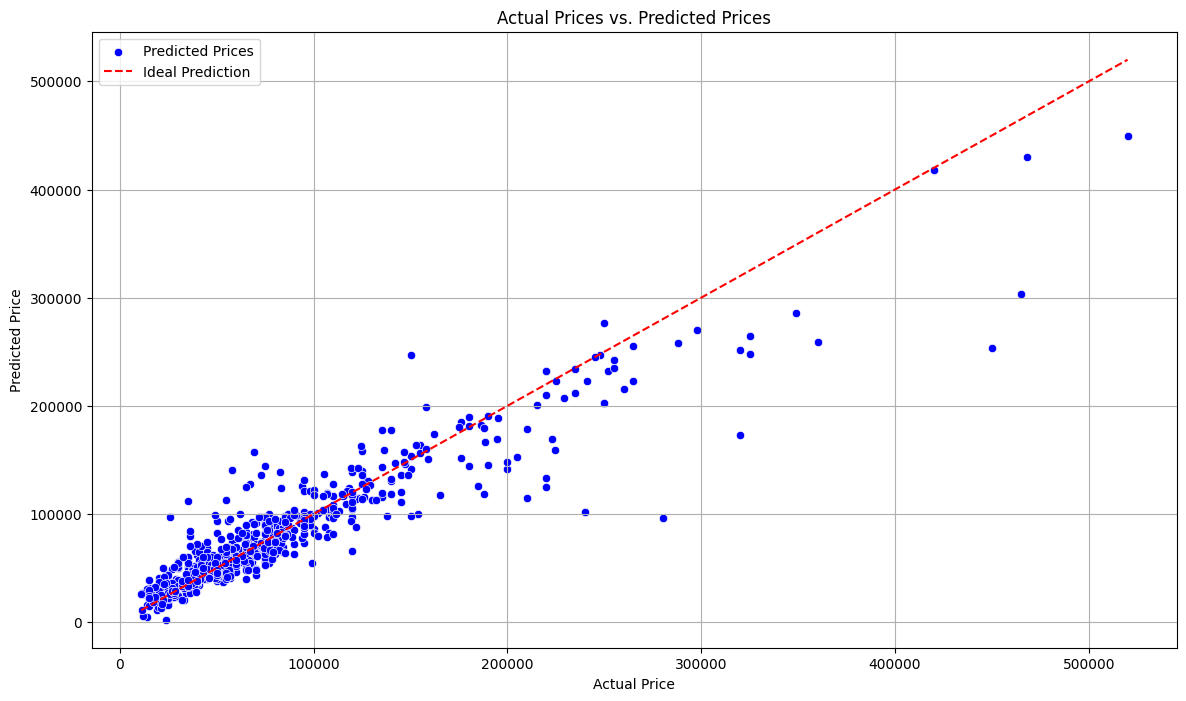

In [27]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a scatter plot
sns.scatterplot(x=y_test, y=y_pred_best_model, color='blue', label='Predicted Prices')

# Add a y=x line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')

# Add title and axis labels
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# b

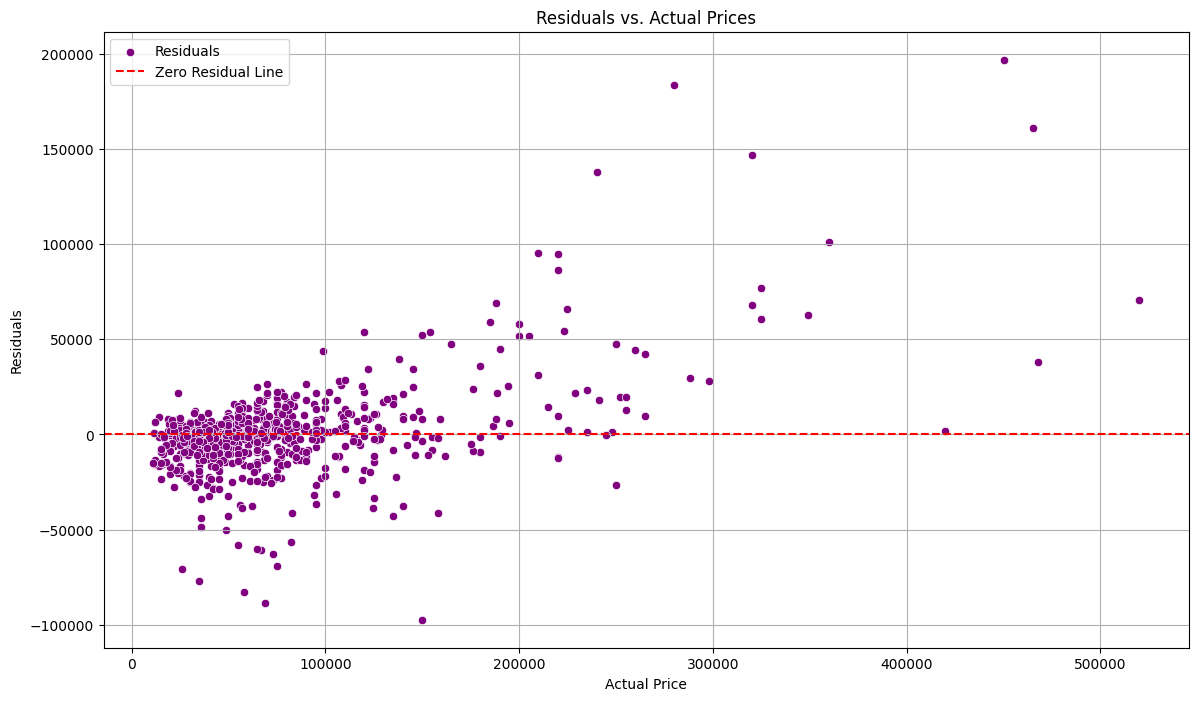

In [28]:
# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Actual Price': y_test,
    'Residuals': y_test - y_pred_best_model
})

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a residual plot using seaborn
sns.scatterplot(x='Actual Price', y='Residuals', data=df, color='purple', label='Residuals')

# Add a horizontal line at y=0
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')

# Add title and axis labels
plt.title('Residuals vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## **Visualisasi**

In [29]:
optuna.visualization.plot_optimization_history(study)

In [30]:
optuna.visualization.plot_parallel_coordinate(study)

In [31]:
optuna.visualization.plot_slice(study)

In [32]:
optuna.visualization.plot_param_importances(study)